# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [6]:
library('tidyverse')
library("palmerpenguins")
locale = Sys.setlocale('LC_ALL','C')

football = read_delim('https://query.data.world/s/5mwlxfcfj44ssdoq5oml6ristkniwj', delim = ';', col_types = cols())
worldcup = read_delim('https://query.data.world/s/xxq2mtwclrfxvghtjncnwgkgng77wk', delim = ',', col_types = cols())

football %>% head()
 worldcup %>% head()  

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
samedi 16 f<e9>vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
samedi 22 d<e9>cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw
samedi 18 ao<U+0B034CB0>18,Liga,FC Barcelona,Alav<e9>s,Alav<e9>s,90+2,3,0,Field goal,Left foot,Won


forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,⋯,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2018-06-22 13:56:23 UTC,Brazil,E,92.77421,3.07229,0.29255,1.63175,1.23547,0.13278,3.12477,⋯,0.65263,0.27308,0.07429,0.00000,0.92571,0.65965,0.45549,0.29535,0.18890,2018-06-22 13:57:55 UTC
2018-06-22 13:56:23 UTC,Spain,B,91.38864,3.27389,0.48460,1.66453,1.22053,0.11494,2.27516,⋯,0.56611,0.41906,0.01483,0.00000,0.98517,0.73972,0.49728,0.30724,0.18647,2018-06-22 13:57:55 UTC
2018-06-22 13:56:23 UTC,France,C,86.48779,2.76853,0.54703,2.54007,0.25749,0.20244,2.76047,⋯,0.79756,0.20244,0.00000,0.00000,1.00000,0.64702,0.35063,0.17142,0.08782,2018-06-22 13:57:55 UTC
2018-06-22 13:56:23 UTC,Germany,F,89.87194,3.13775,0.52709,1.39579,0.37729,1.22692,2.03941,⋯,0.22814,0.41446,0.29106,0.06634,0.64260,0.36876,0.24469,0.14799,0.08652,2018-06-22 13:57:55 UTC
2018-06-22 13:56:23 UTC,Belgium,G,85.87448,2.81925,0.61027,2.11809,0.45853,0.42338,4.80278,⋯,0.57349,0.38226,0.04346,0.00079,0.95575,0.68137,0.33240,0.16993,0.08281,2018-06-22 13:57:55 UTC
2018-06-22 13:56:23 UTC,England,G,83.76237,2.37450,0.47318,2.10340,0.48001,0.41659,2.61236,⋯,0.42081,0.53576,0.04164,0.00179,0.95657,0.67293,0.33344,0.16661,0.07817,2018-06-22 13:57:55 UTC


In [16]:
##table summary
df_summary=football %>%
drop_na() %>%
group_by(`Goal Type`, `Goal Method`) %>%
count()    # calculate the name count for each group
#display goal type and goal delivery method; will count occurances and summarize
df_summary

Goal Type,Goal Method,n
<chr>,<chr>,<int>
Field goal,Head,2
Field goal,Left foot,102
Field goal,Right foot,16
Free kick,Left foot,35
Penalty,Left foot,64
Rebound,Head,1
Rebound,Left foot,24
Rebound,Right foot,7
Solo run,Left foot,12


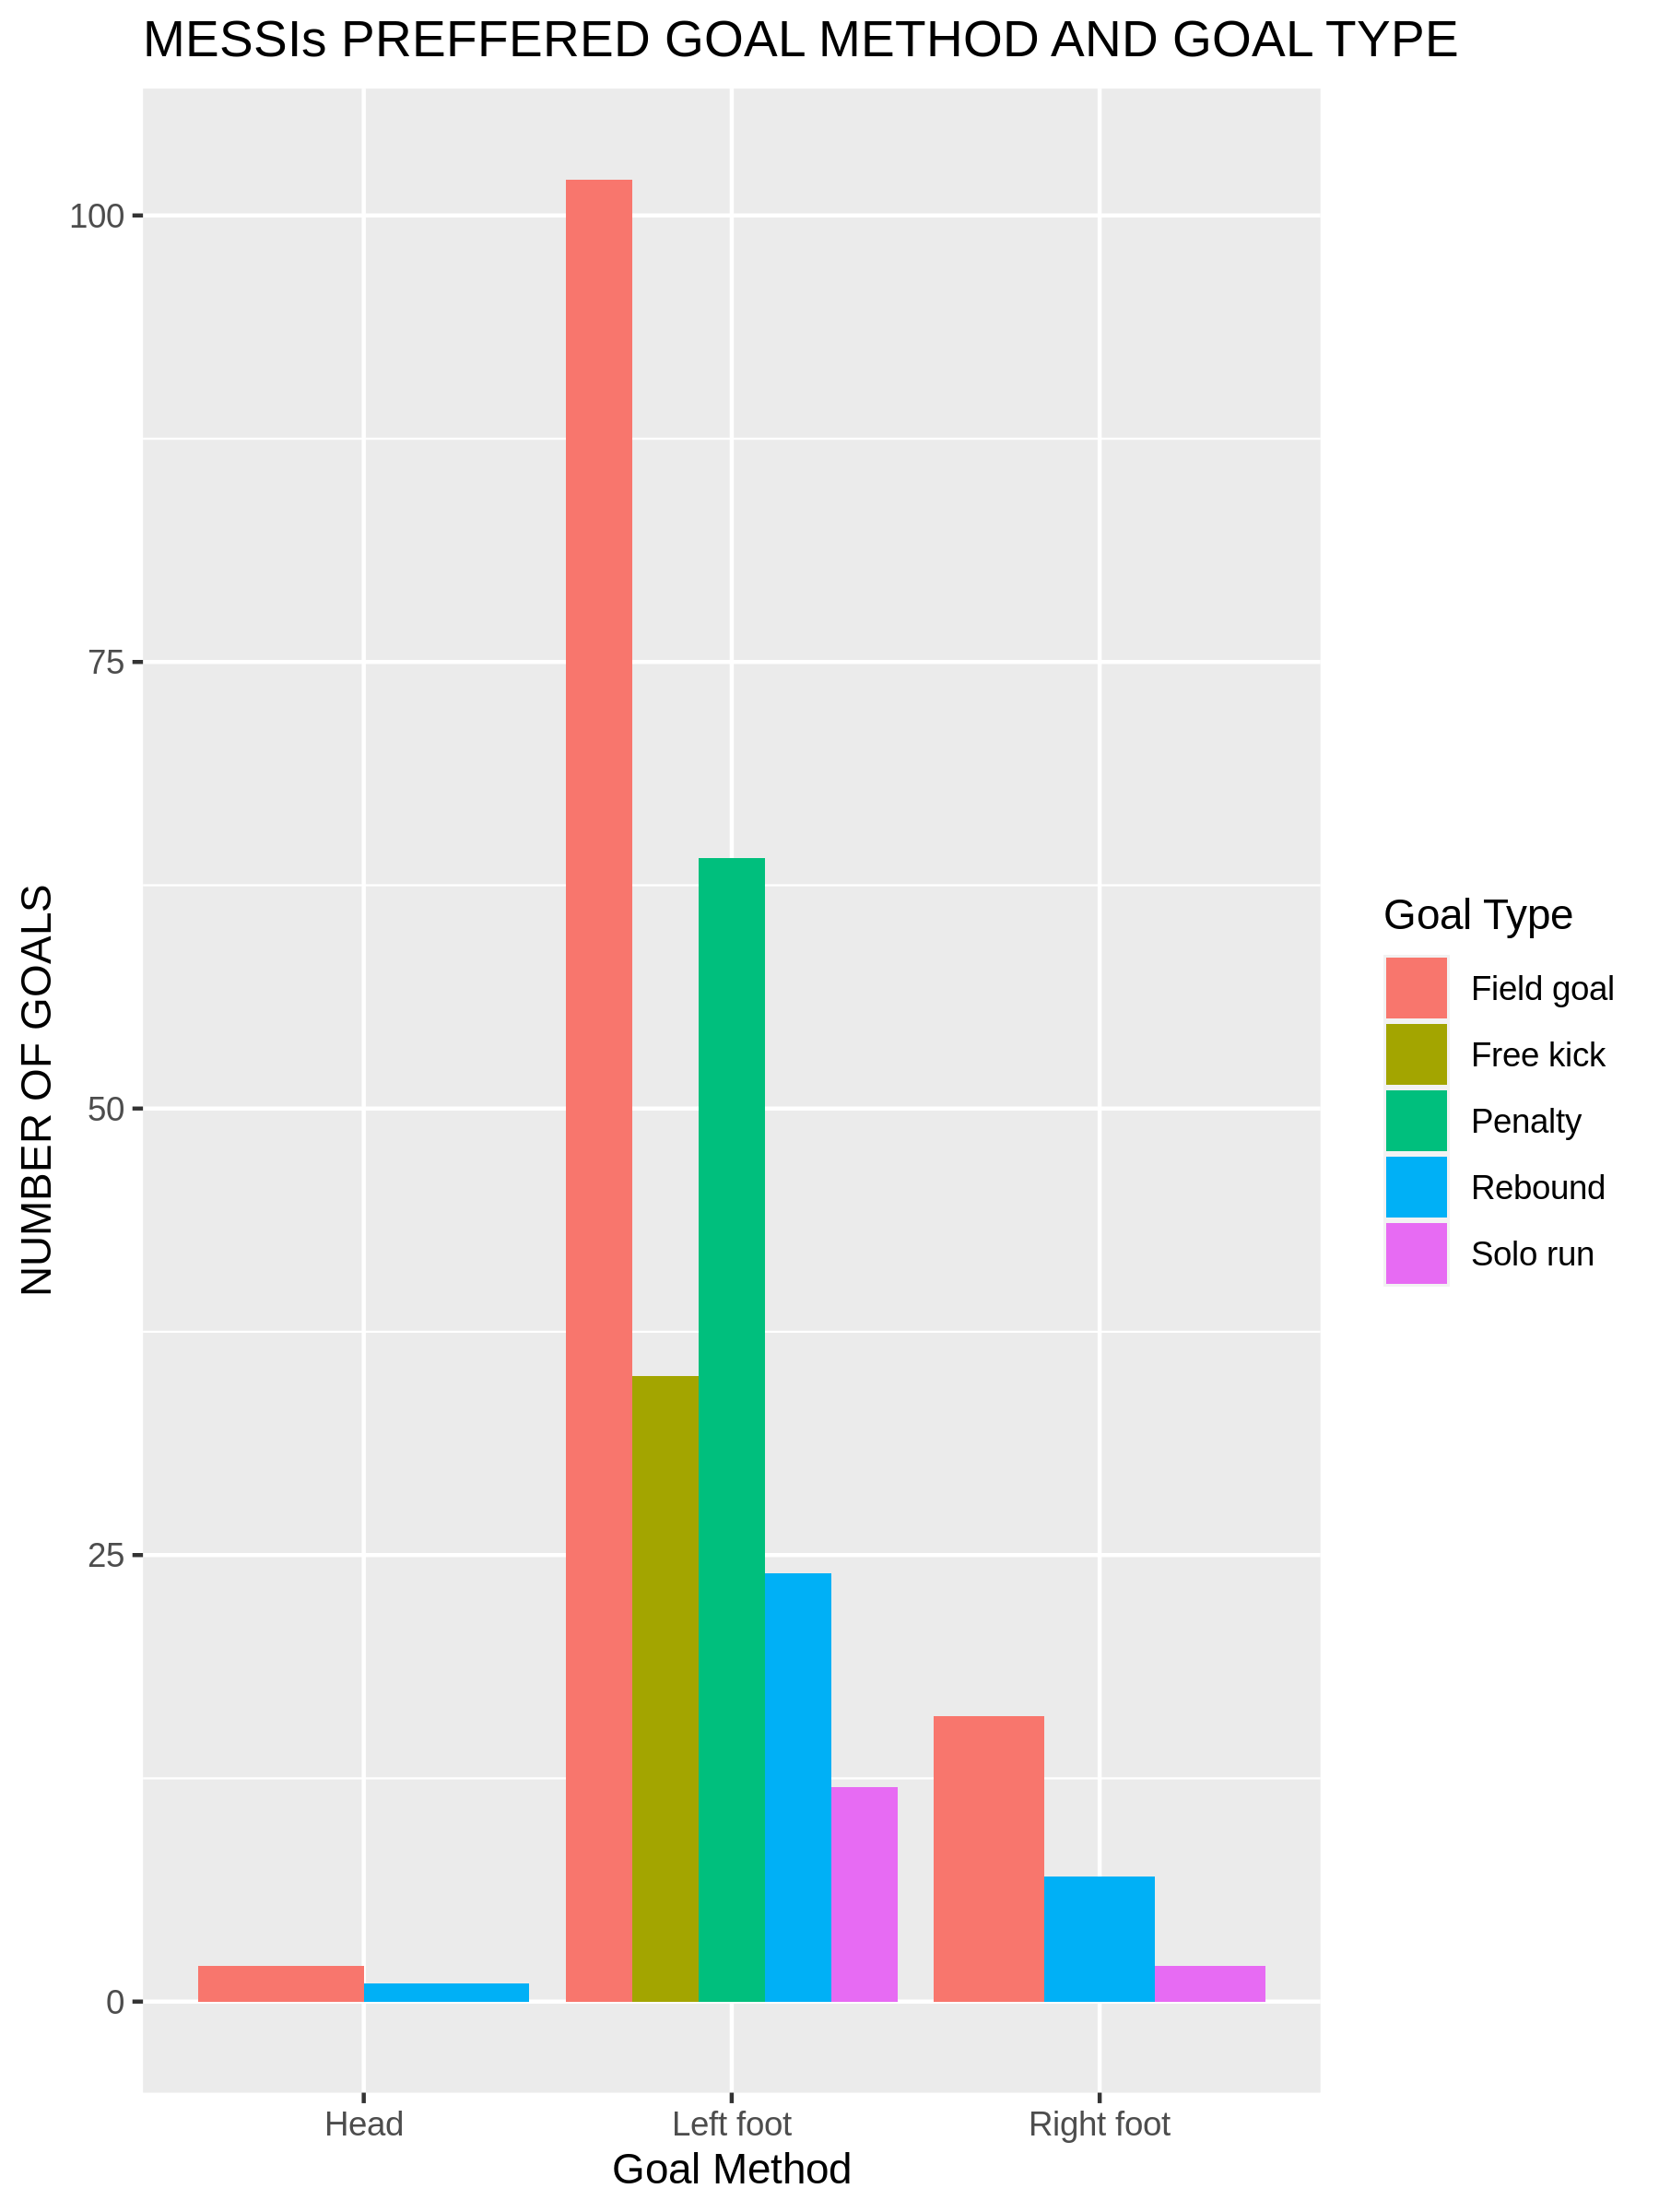

In [17]:
p = ggplot(df_summary, aes(x = `Goal Method`, y = `n`, fill = `Goal Type`))

p = p + geom_col(position = "dodge")+labs(title = 'MESSIs PREFFERED GOAL METHOD AND GOAL TYPE', y = 'NUMBER OF GOALS') 
#will display the df_summary data set made above into a bar/column chart.
p

In [18]:
worldcup_summary= worldcup |> 
                            group_by(team) |> 
                            #select(make_round_of_16, team) |> 
                           # filter(make_round_of_16 > 4) |> 
                            summarize(make_16 = mean(make_round_of_16), FINAL=mean(make_final))  
#summarizes and averages any multiple occurances in data for a country for round of 16 probabilities as well as final winning probabilities.
worldcup_summary

team,make_16,FINAL
<chr>,<dbl>,<dbl>
Argentina,0.59307667,0.1009066667
Australia,0.15957667,0.0016033333
Belgium,0.92758333,0.1607433333
Brazil,0.88955000,0.2912300000
Colombia,0.49070333,0.0352466667
Costa Rica,0.06802667,0.0013833333
Croatia,0.82760667,0.1085266667
Denmark,0.73159000,0.0374633333
Egypt,0.15457333,0.0015866667


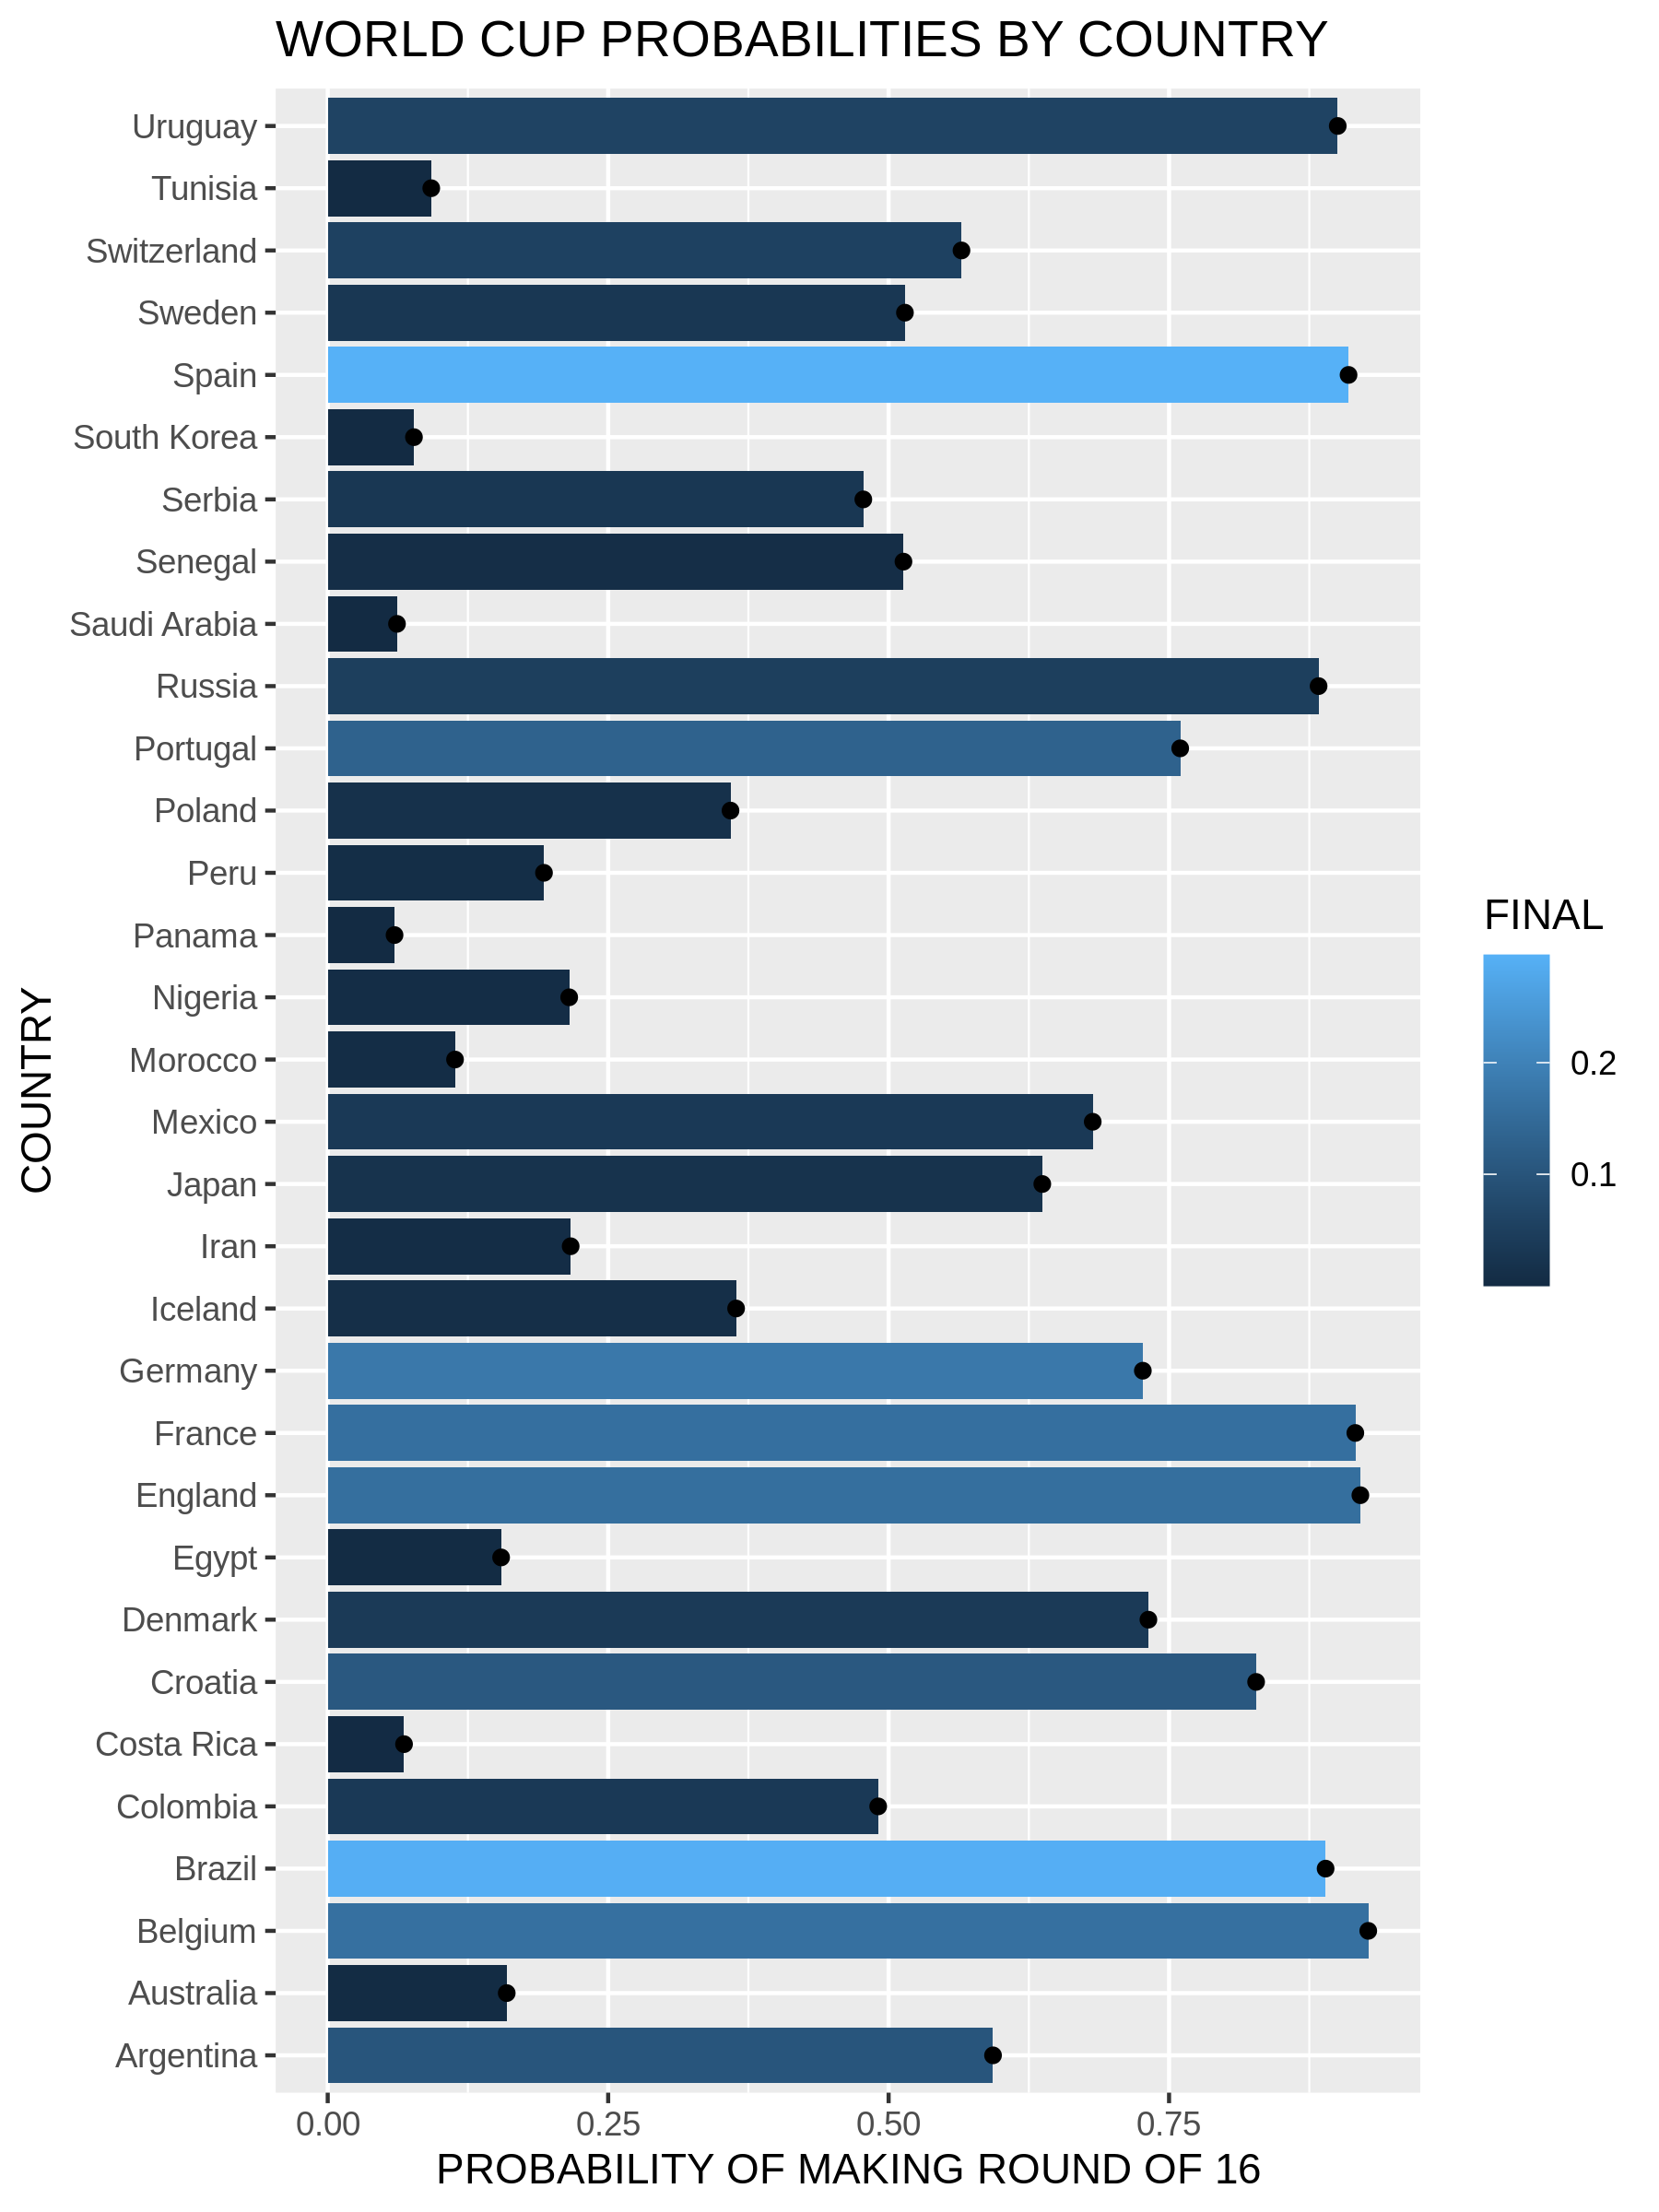

In [19]:
options(repr.plot.width=6, repr.plot.height=8)

p = ggplot(worldcup_summary, aes(x = make_16, y = team, fill = FINAL))
   
p = p + geom_col()+geom_point()  +labs(title = 'WORLD CUP PROBABILITIES BY COUNTRY', x = 'PROBABILITY OF MAKING ROUND OF 16', y= 'COUNTRY') 
# makes a chart of the summarized world cup data made above.
p

[![Alt text](https://sportshub.cbsistatic.com/i/r/2018/07/15/029ab197-a4f9-45e5-a527-b14ecf10bee5/resize/670x377/de3b15f74ab53a7e61fdd33e85ad894a/world-cup-bracket-2018.jpg)

2018 FIFA WORLD CUP FINAL BRACKET  
  
  Explanation:  
I have used two different data sets to look at two interesting things that I thought would be really cool to explore. As a soccer fan, I decided to analyze the pattern by which the greatest player of all time and my idol, Lionel Messi, scores his goals. I thought this would be interesting because it gives an insight into what methods Messi usually employs to make his goals and also what type goals he usually goes for during the game. Also being that it is the world cup season, I also decided to analyse the predicted probabilities from a 2018 worldcup dataset inorder to see how accurate it was in predicting the winner, which was France.  
In the first data set I decided to use dplyR to simplify and group the dataset by goal type(field goal, free kick, penalty, rebound and solo run) and goal method (Head, left foot and right foot). Looking at the bar graph, it looks like Messi highly uses his left leg to score goals, which is most probably his dominant foot. Specifically, it looks like he uses his left foot most to make field goals (102 goals) followed by penalty(64) and freekick(35). This is interesting because I thought Messi was an ambidextrous player but the data suggests that he is really left foot dominant. It seems like he does still use both his right(16) and left foot to make field goals. Messi also uses his right foot to rebound(7 goals) the ball a good amount. This tells us that he doesn't use his right foot unless he absolutely needs to use it in game and is sure can capitalize on it. It was also surprising that Messi didn't use his head(3 total goals) much in scoring goals which makes sense because you really can't control the ball very much with a header and requires perfect timing which can be rare.  
In the 2018 world cup dataset, I again used doppler to group by team and average their probabilities for each team to look at how true they were in predicting if a team would make it to the round of 16, but most importantly take it all as the world champion. Specifically, I wanted to look at France and Croatia because France was the champion while Croatia was the runner up,  with the major upsets being Brazil and Russia losing the round of 16. France had a 16% probability of winning the worldcup, which is laughable now that I think about it and really tells you how unpredictable these games are. Croatia had a 11% chance of winning, which was also an incorrect prediction as Croatia came extremely close winning everything. Spain and Brazil had a 30% probability each (highest projection of all teams) when it came to winning the world cup, which is also funny because spain had a 91% probability of making it to the round of 16, and it didn't make it. These precictions show how hilariously incorrect the predictions were from the 2018 world cup and really shows how volatile the sport is. If anything, I can take away the fact that I should never bet on the world cup, even if the predicted odds are really high.
